In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dff = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [4]:
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dff.shape

(768, 9)

In [6]:
dff.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dff['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [8]:
dff.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#separating data and lebel
x = dff.drop(columns = 'Outcome', axis=1)
y = dff['Outcome']

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Data Standardization

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x)

StandardScaler()

In [14]:
std_data = scaler.transform(x)

In [15]:
x = std_data

In [16]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [18]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

614 154
614 154


**Training the Model**

In [19]:
classifier = svm.SVC(kernel = 'linear')

In [20]:
#training the support vector machine Classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Accuracy Score

In [21]:
#accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [22]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [23]:
#accuracy score on the test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [24]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Predictive system

In [25]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


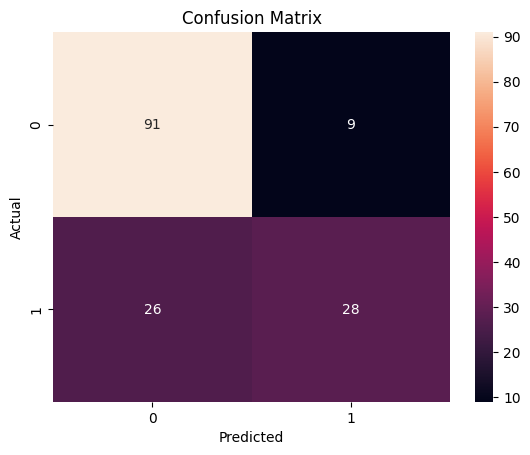

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



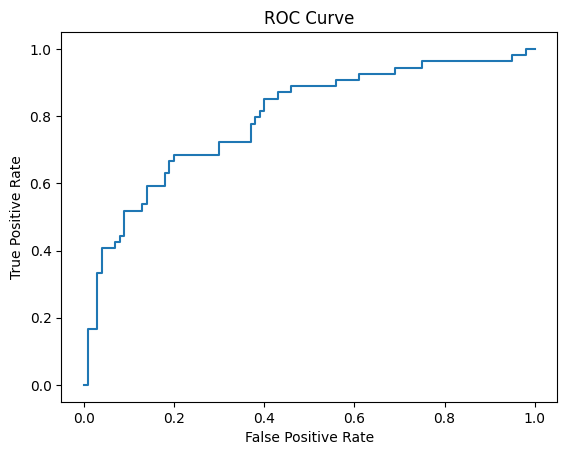

ROC AUC Score: 0.7920370370370371


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, x_test_prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, x_test_prediction))

# ROC AUC Score
y_probs = classifier.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


**Build an Interactive Web App (Gradio)**

In [26]:
import gradio as gr

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness,
                     Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness,
                            Insulin, BMI, DiabetesPedigreeFunction, Age]])
    std_input = scaler.transform(input_data)
    prediction = classifier.predict(std_input)
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

interface = gr.Interface(fn=predict_diabetes,
                         inputs=[
                             gr.Number(label="Pregnancies"),
                             gr.Number(label="Glucose"),
                             gr.Number(label="Blood Pressure"),
                             gr.Number(label="Skin Thickness"),
                             gr.Number(label="Insulin"),
                             gr.Number(label="BMI"),
                             gr.Number(label="Diabetes Pedigree Function"),
                             gr.Number(label="Age")
                         ],
                         outputs=gr.Text(label="Prediction"),
                         title="Diabetes Prediction App")

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e5833d9786ef1f4a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [29]:
import pickle

# Save the trained SVM model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

# Save the scaler used for standardization
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
